In [264]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [265]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

In [266]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

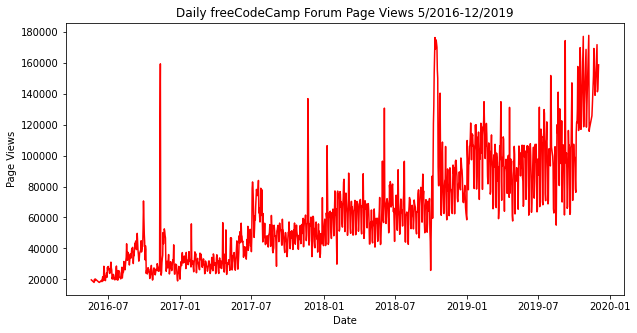

In [267]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
sns.lineplot(data = df, x = 'date', y = 'value', color='red')

In [268]:
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()

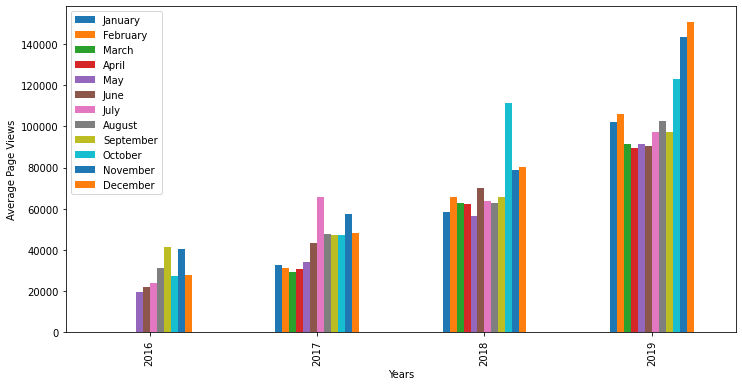

In [269]:
# Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize=(12, 6), ylabel='Average Page Views', xlabel='Years').figure
plt.legend(['January', 'February','March','April','May','June','July','August','September','October','November','December',])

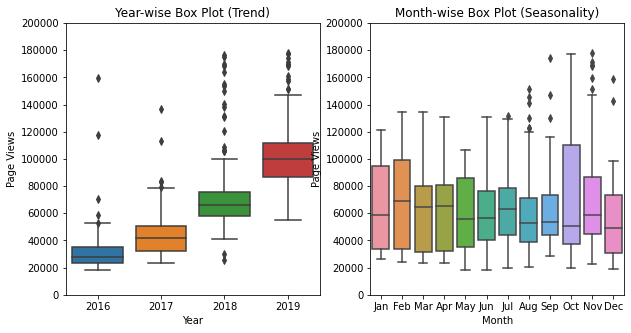

In [270]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

#df_box['order'] = df_box['date'].dt.month
#df_box = df_box.sort_values('order')

#df_box = df_box.sort_values(df_box['date'])
labels = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x=df_box['year'], y=df_box['value'], ax=ax[0]) # 1st plot
sns.boxplot(x=df_box['month'], y=df_box['value'], ax=ax[1], order=labels) # 2nd plot

ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')
ax[0].set(ylim=(0, 200000))
ax[0].set_yticks(np.arange(0, 200001, 20000))

ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')
ax[1].set(ylim=(0, 200000))
ax[1].set_yticks(np.arange(0, 200001, 20000))